# Diagnostics of Regression Model

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
data = pd.read_csv('http://pythontrade.com/public/Data/pro2/adv.csv',index_col=0)

In [37]:
print data.head()
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='Sales ~ TV', data=data)
lm=lm1.fit()
lm.summary()

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 27 Nov 2015   Prob (F-statistic):           1.47e-42
Time:                        16:45:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observed error

- **Observed error**: $\hat{\epsilon}=y_i-\hat{y}_i$


In [38]:
real=data['Sales']
predict=lm.params[0]+lm.params[1]*data['TV']
error=real-predict

# How to garanteen our statistical conclusion is correct? 


**Our built model must satisify: **


## 1.  Observed errors' means are nearly zero

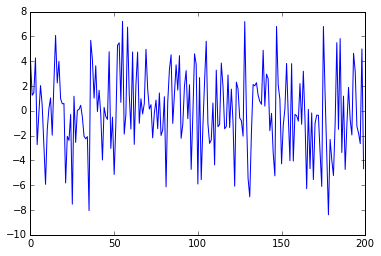

In [39]:
plt.plot(error)

## 2. Observed errors' variances are nearly equal

-  homoscedastic

-  heteroscedastic

## 3. Observed errors are independent 

-  Durbin-Watson test
- $ D=\sum_{i=1}^n\frac{(\hat{\epsilon}_i-\hat{\epsilon}_{i-1})^2}{\hat{\epsilon}_i^2}\approx 2(1-r)$
- if $D<d_L$, there is  positive autocorrelation
- if $D>d_U$, there is  negative autocorrelation

In [40]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 27 Nov 2015   Prob (F-statistic):           1.47e-42
Time:                        16:45:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Observed  Errors  are roughly normal

- Q-Q plot


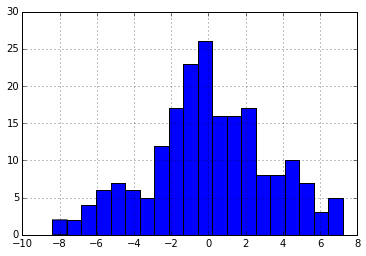

In [46]:
error.hist(bins=20)

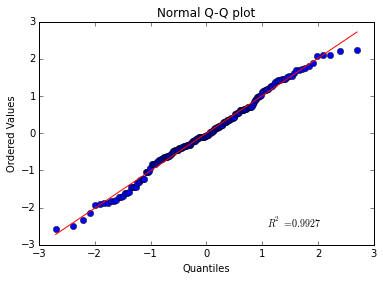

In [47]:
import scipy.stats as stats
import numpy as np
z = (error-np.mean(error))/np.std(error)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

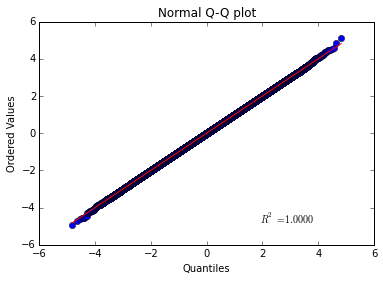

In [49]:
z1=np.random.normal(0,1,1000000)

stats.probplot(z1, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

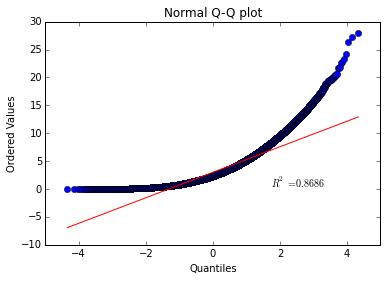

In [51]:
z1=np.random.normal(0,1,100000)
z2=np.random.normal(0,1,100000)
z3=np.random.normal(0,1,100000)
x=z1**2+z2**2+z3**2

stats.probplot(x, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()